**Log Tansformation**

Basically, log transformation is used when the data is right skewed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

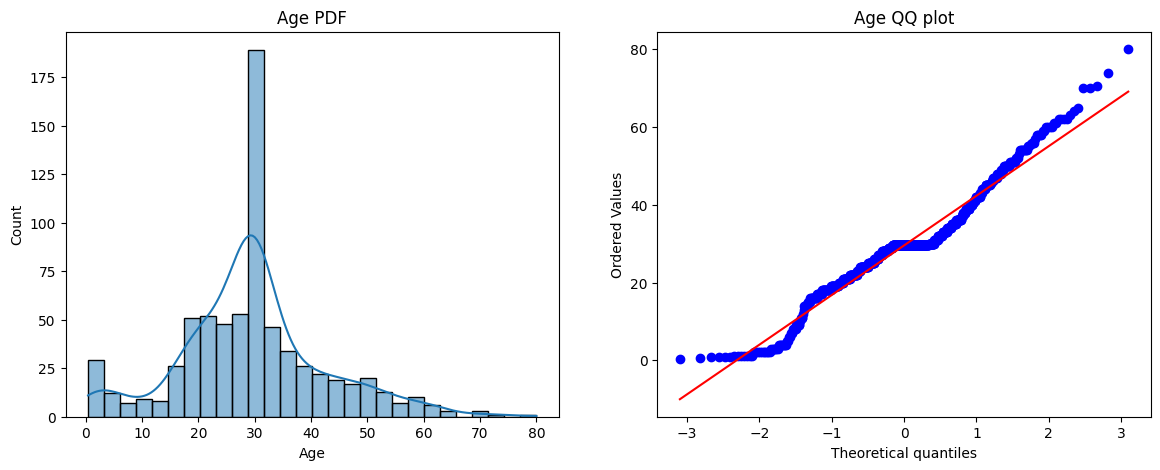

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121) #1 row, 2 columns, 1st plot
sns.histplot(X_train['Age'], kde=True)
plt.title("Age PDF")

plt.subplot(122) #1 row, 2 columns, 2nd plot
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')
plt.show()

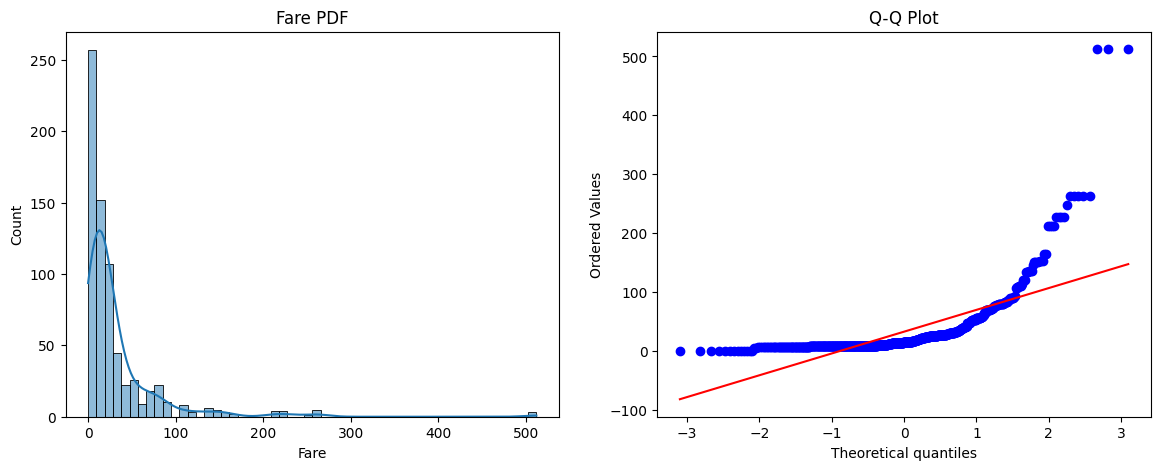

In [15]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Q-Q Plot")
plt.show()

**without log transformer**

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


**with log transformer**

In [24]:
trf = FunctionTransformer(func=np.log1p)

In [25]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [26]:
clf4 = LogisticRegression()
clf5 = DecisionTreeClassifier()

In [27]:
clf4.fit(X_train_transformed, y_train)
clf5.fit(X_train_transformed, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred4 = clf4.predict(X_test_transformed)
y_pred5 = clf5.predict(X_test_transformed)

In [29]:
print("Accuracy LR", accuracy_score(y_test, y_pred4))
print("Accuracy DT", accuracy_score(y_test, y_pred5))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [30]:
X_transformed = trf.fit_transform(X)
clf4 = LogisticRegression()
clf5 = DecisionTreeClassifier()

In [31]:
print("LR", np.mean(cross_val_score(clf4, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf5, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6611111111111112


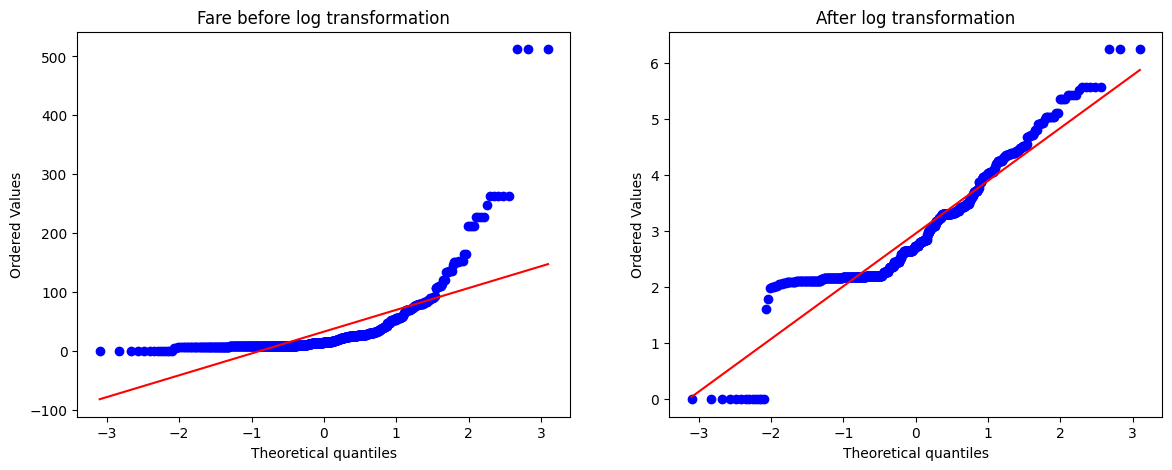

In [33]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare before log transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("After log transformation")
plt.show()

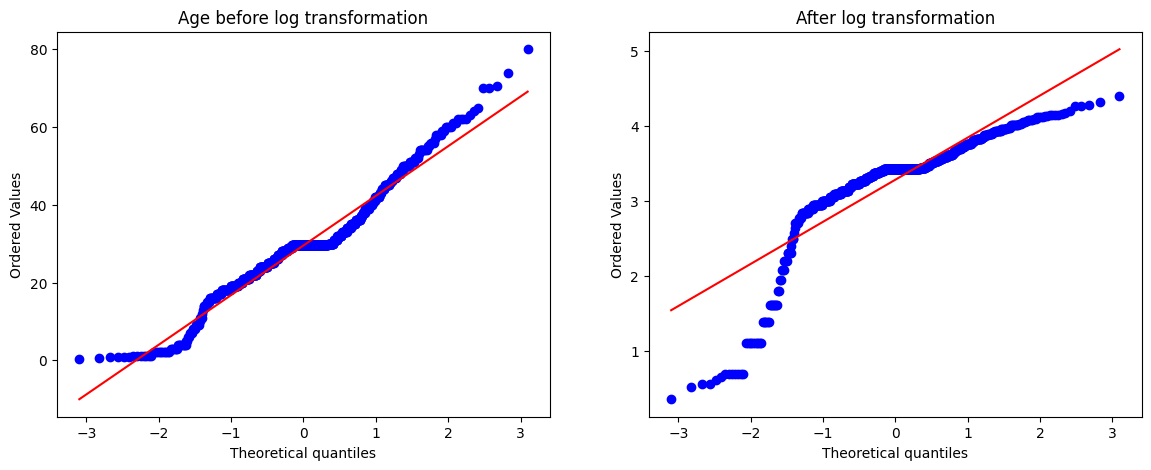

In [34]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age before log transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title("After log transformation")
plt.show()

We can see that, after applying log transformation in age column, it devative from the normal distribution. so we only apply log transformation in fare column but not in age.

In [35]:
trf1 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')
X_train_transformed1 = trf1.fit_transform(X_train)
X_test_transformed1 = trf1.fit_transform(X_test)

In [36]:
clf1 = LogisticRegression()
clf3 = DecisionTreeClassifier()

In [37]:
clf1.fit(X_train_transformed1, y_train)
clf3.fit(X_train_transformed1, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
y_pred3 = clf1.predict(X_test_transformed1)
y_pred6 = clf3.predict(X_test_transformed1)

In [39]:
print("Accuracy", accuracy_score(y_test, y_pred3))
print("Accuracy", accuracy_score(y_test, y_pred6))

Accuracy 0.6703910614525139
Accuracy 0.6703910614525139


In [46]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    stats.probplot(X_train['Fare'], dist='norm', plot=plt)
    plt.title("Fare before log transformation")

    plt.subplot(122)
    stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
    plt.title("After log transformation")

    plt.show()

Accuracy 0.6712609238451936


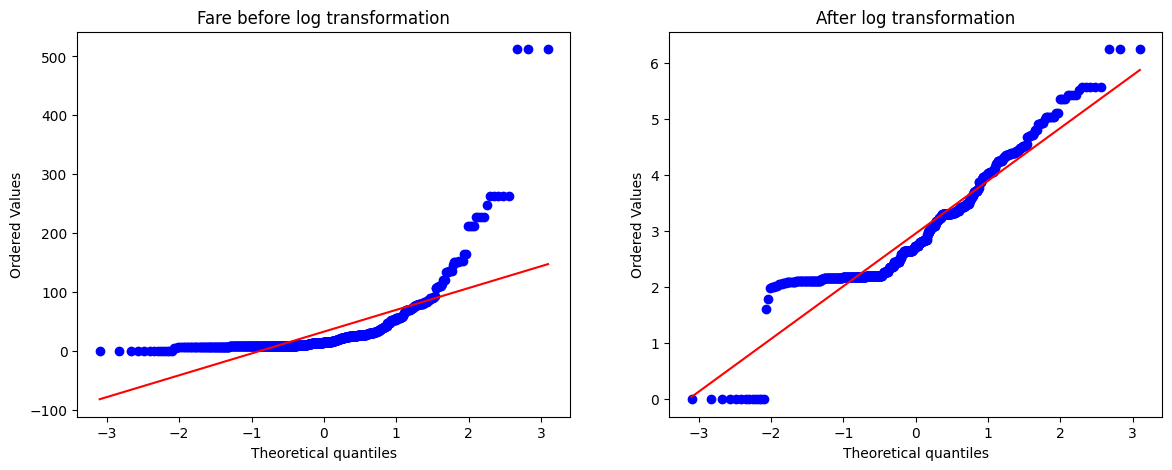

In [47]:
apply_transform(lambda x: x)